# Table of Contents

* [Introduction](#Introduction)
* [1.Business Understanding](#Business_Understanding)
* [2.Data Understanding](#Data_Understanding)
    * [2.1 Explore Airbnb Seattle Datasets](#Explore_Airbnb_Seattle_Datasets)
        * [2.1.1 Explore Calendar Dataset](#Explore_Calendar_Dataset) 
             * [2.1.1.1 Missing Values](#Missing_Values) 
             * [2.1.1.2 Unique Values](#Unique_Values) 
        * [2.1.2 Explore Listings Dataset](#Explore_Listings_Dataset)   
             * [2.1.2.1 Missing Listing Values](#Missing_Listing_Values) 
             * [2.1.2.2 Unique Listing Values](#Unique_Listing_Values)  
        * [2.1.3 Explore Reviews Dataset](#Explore_Reviews_Dataset)   
             * [2.1.3.1 Missing Review Values](#Missing_Review_Values) 
             * [2.1.3.2 Unique Review Values](#Unique_Review_Values)                
* [3.Data Preparation](#Data_Preparation)
    * [Q1. How the availability of listings and price vary over the course of the year? ](#price_list_year)
    * [Q2. Explore monthly price variation over the course of the year in greater depth](#monthly_price)
    * [Q3. Price Influencers](#price_influencers)
        * [Feature Selection Using Univariate Analysis](#Univariate_analysis)
        * [Feature Selection Using Recursive Feature Elimination](#RFE)  
* [4.Modeling](#Modeling) 
* [5.Results and Evaluation](#Results_and_Evaluation) 
* [6.Conclusion](#Conclusion) 



# Introduction

This notebook follows the CRISP-DM process to analyze the Seattle AirBnb Open Data on Kaggle (https://www.kaggle.com/airbnb/seattle/data).

- Business Understanding
    • Understanding project objectives and requirements; Data mining problem definition
- Data Understanding
    • Initial data collection and familiarization; Identify data quality issues; Initial,
obvious results
- Data Preparation
    • Record and attribute selection; Data cleansing
- Modeling
    • Run the data mining tools
- Evaluation
    • Determine if results meet business needs
- Deployment
    • Put the resulting models into practice; Set up for continuous mining of the data    

## 1.Business Understanding <a class="anchor" id="Business_Understanding"></a>

Airbnb Inc, is an American online marketplace and hospitality service brokerage company based in San Francisco, California, United States. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences.

The booking price of the properties vary according various attributes like its location, property type, size, number of rooms, amenities, day of the week and month of the year etc. Airbnb made its dataset about property listings in Seattle in 2016 publicly available on Kaggle.

Our goal is to study this dataset to understand the major trends in the pricing over the year and across the neighbourhoods in Seattle. We also want to understand through statistical modelling about how the attributes related to the property might be influencing the booking price on Airbnb.

We are mainly driven by the below questions for our analysis:

-   Q1. How the availability of listings and price vary over the course of the year?
-   Q2. Explore monthly price variation over the course of the year in greater depth
-   Q3. Price Influencers
       - Feature Selection Using Univariate Analysis
       - Feature Selection Using Recursive Feature Elimination 
-   Q4. Build Two Linear Regression Models using the selected features and compare their performance.       



## 2.Data Understanding <a class="anchor" id="Data_Understanding"></a>

We are provided with 3 datasets by Kaggle 
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

In this step we will try to understand these datasets in sufficient detail to help us answer the questions mentioned in step 1.

### 2.1  Explore Airbnb Seattle Datasets <a class="anchor" id="Explore_Airbnb_Seattle_Datasets"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
%matplotlib inline

In [3]:
datadir_location='/Users/gangireddyl/Downloads/seattle_airbnb' #modify path to a location on your local directory

In [4]:
os.listdir(datadir_location)

['reviews.csv',
 '.DS_Store',
 'reviews.csv.zip',
 'listings.csv',
 'calendar.csv',
 'calendar.csv.zip',
 'listings.csv.zip']

## Extract 

In [5]:
revcsv  = os.path.join(datadir_location, 'reviews.csv')
listcsv = os.path.join(datadir_location, 'listings.csv')
calcsv  = os.path.join(datadir_location, 'calendar.csv')

In [6]:
df_cal =  pd.read_csv(calcsv)
df_rev =  pd.read_csv(revcsv)
df_list = pd.read_csv(listcsv)

In [7]:
df_cal.shape , df_rev.shape, df_list.shape

((1393570, 4), (84849, 6), (3818, 92))

In [8]:
print ("listing has {} no. of rows and {} no. of columns".format(df_list.shape[0], df_list.shape[1] ))
print ("calender has {} no. of rows and {} no. of columns".format(df_cal.shape[0], df_cal.shape[1] ))
print ("reviews has {} no. of rows and {} no. of columns".format(df_rev.shape[0], df_rev.shape[1] ))

listing has 3818 no. of rows and 92 no. of columns
calender has 1393570 no. of rows and 4 no. of columns
reviews has 84849 no. of rows and 6 no. of columns


- listings has the maximum number of columns i.e. 92
- Calendar dataset has the maximum number of rows 
- Let us set the display options fo pandas so all columns are displayed.

In [9]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#### 2.1.1 Explore Calendar Dataset <a class="anchor" id="Explore_Calendar_Dataset"></a>

In [10]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


##### 2.1.1.1 Missing Values <a class="anchor" id="Missing_Values"></a>

In [11]:
df_cal.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [12]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


- price is listed as type object

In [13]:
len(df_cal.listing_id.unique())

3818

In [14]:
df_cal.available.unique()

array(['t', 'f'], dtype=object)

##### 2.1.2.2 Unique Values <a class="anchor" id="Unique_Values"></a>

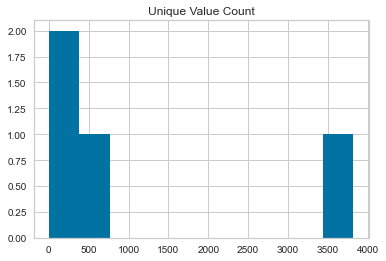

In [15]:
pd.DataFrame((df_cal.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count']).hist();

In [16]:
pd.DataFrame((df_cal.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count'])

,Unique Value Count
listing_id,3818
date,365
available,2
price,669


- price is not always populated. Rest of the fields always have values
- 3818 unique listings are available which exactly match with the rows in listing dataset

#### Formating 'price' column:


- 'Price' is central to answer some of our questions, it has some null values...
-  But it has a dolar sign and therefore it is represented as string object. 
-  Inorder to proceed further the '$' sign will have to be removed and dtype of 'price' coumn will be changed to float.

In [17]:
df_cal['price'] = df_cal['price'].str.replace("[$, ]", "", regex=True).astype("float")
df_cal['price'].head()

0    85.0
1    85.0
2     NaN
3     NaN
4     NaN
Name: price, dtype: float64

In [18]:
df_cal['available'] = df_cal['available'].apply(lambda x: 1 if x =='t' else 0)

In [19]:
df_cal.dtypes

listing_id      int64
date           object
available       int64
price         float64
dtype: object

#### 2.1.2 Explore Listings Dataset <a class="anchor" id="Explore_Listings_Dataset"></a>

In [20]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

- listings dataset has 3812 rows and 92 columns
- When it comes to columns they fal into 5 broad categories: host-related, review-related, property-related, listing-related, or location-related.

##### 2.1.2.1 Missing Listing Values <a class="anchor" id="Missing_Listing_Values"></a>

In [21]:
df_list.isnull().mean()

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [22]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

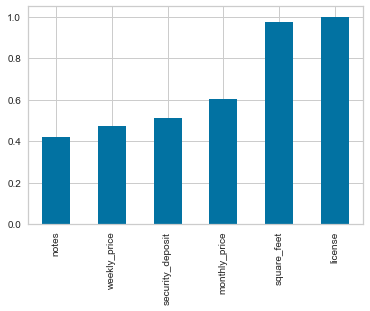

<Figure size 21600x18000 with 0 Axes>

In [23]:
#a look at columns with most missing values
missing = df_list.isnull().mean()
missing = missing[missing > 0.40]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.figure(figsize=(300,250));

- We can drop the columns license and square_feet as they are mostly NULL
- Also the columns notes and security_deposit are not useful to answer our questions and can be dropped
- Let us prepare a list of columns that can be dropped based on what we have seen so far

In [24]:
dropped_cols_list = ['listing_url',  'scrape_id','last_scraped', 'name','summary','space','description','experiences_offered','notes','transit','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_location', 'host_about','host_thumbnail_url','host_has_profile_pic', 'street', 'market','smart_location','country_code','country','latitude','longitude','square_feet','license','jurisdiction_names','require_guest_profile_picture']


In [25]:
df_list.drop(dropped_cols_list,axis=1,inplace=True)

In [26]:
# Inorder to perform merge we will have to rename id to listing_id in listing df: We would then be able to merge listings and calendar datasets
df_list.rename(columns={'id':'listing_id'}, inplace=True)

##### 2.1.2.2 Unique Listing Values  <a class="anchor" id="Unique_Listing_Values"></a>

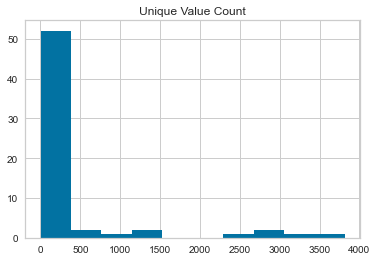

In [27]:
pd.DataFrame((df_list.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count']).hist();

- Most columns have a limited of unique values but there appear to be a few columns that have a unique value for almost every row. 
- These are probably the id , host_id , neighbourhood_overview fields

In [28]:
pd.DataFrame((df_list.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count'])

,Unique Value Count
listing_id,3818
neighborhood_overview,2506
host_id,2751
host_name,1466
host_since,1380
host_response_time,4
host_response_rate,45
host_acceptance_rate,2
host_is_superhost,2
host_picture_url,2743


In [29]:
df_list[['price','weekly_price','monthly_price']].head()

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


#### Format price, weekly and monthly price

In [30]:
df_list['price'] = df_list['price'].str.replace("[$, ]", "", regex=True).astype("float")
df_list['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [31]:
### weekly_price and monthly_price also have '$' and are defined as dtype object.

In [32]:
df_list['weekly_price'] = df_list['weekly_price'].str.replace("[$, ]", "", regex=True).astype("float")
df_list['monthly_price'] = df_list['monthly_price'].str.replace("[$, ]", "", regex=True).astype("float")

###  Identify Outliers

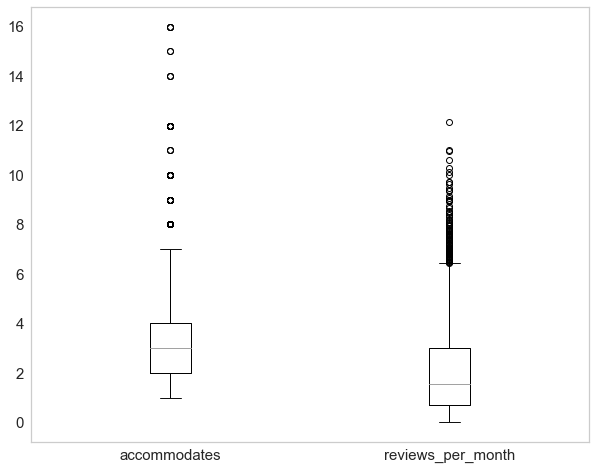

In [33]:
boxplot = df_list.boxplot(grid=False, fontsize=15,column=[ "accommodates", "reviews_per_month"],figsize=(10,8));

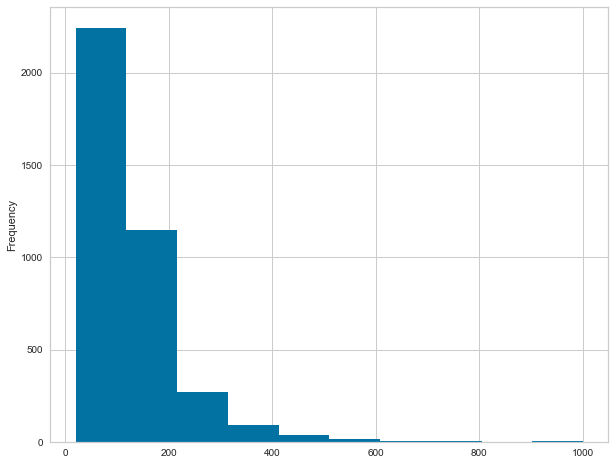

In [34]:
df_list['price'].plot.hist(bins=10,figsize=(10,8));

- Most of the listings are under \$300
- There are some clear outliers with a listing price in the range of \\$900 \- \\$1000

In [35]:
df_list.loc[df_list['price']>900]

,listing_id,neighborhood_overview,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2,3308979,Upper Queen Anne is a charming neighborhood fu...,16708587,Jill,2014-06-12,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,2,1.15
1208,3345341,This neighborhood is AWESOME! We are: - 1 stre...,3906464,Amy,2012-10-17,within a few hours,100%,100%,f,https://a0.muscache.com/ac/users/3906464/profi...,Belltown,2.0,2.0,"['phone', 'facebook', 'google', 'linkedin', 'r...",f,Belltown,Belltown,Downtown,Seattle,WA,98101,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Elevato...",999.0,NaN,NaN,$95.00,$85.00,1,$10.00,1,31,today,t,0,0,0,0,2016-01-04,54,2014-06-23,2015-06-28,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,f,1,2.89
3122,4825073,NaN,632896,Christina,2011-05-27,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/632896/profil...,Ravenna,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,Ravenna,Roosevelt,Other neighborhoods,Seattle,WA,98115,t,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",1000.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125,13 months ago,t,23,53,83,358,2016-01-04,1,2014-12-22,2014-12-22,100.0,10.0,10.0,10.0,10.0,8.0,10.0,f,f,flexible,f,1,0.08
3443,2720963,NaN,3676438,Dan,2012-09-25,within a few hours,100%,NaN,f,https://a2.muscache.com/ac/users/3676438/profi...,Magnolia,1.0,1.0,"['email', 'phone', 'linkedin', 'reviews', 'kba']",t,Magnolia,Southeast Magnolia,Magnolia,Seattle,WA,98199,t,House,Entire home/apt,6,3.5,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",950.0,NaN,NaN,$250.00,NaN,6,$100.00,3,1125,5 months ago,t,30,60,90,365,2016-01-04,5,2015-06-17,2015-08-21,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,strict,f,1,0.74


- On visual inspection we cannot say why these listings are very highly priced
- There is one which accomodates 11 people but others accomodated 4-6 which is under the 3rd quartile.
- entire Home/apt is available but that's common with many lother lists
- These listings have very good ratings. Perhaps they are in a good neighbourhood but so are many properties in those neighbourhoods.
- As we are unclear let us keep them instead of dropping them.

In [36]:
df_list.accommodates.value_counts()

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
14       3
11       3
15       2
Name: accommodates, dtype: int64

In [37]:
df_list.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [38]:
df_list.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

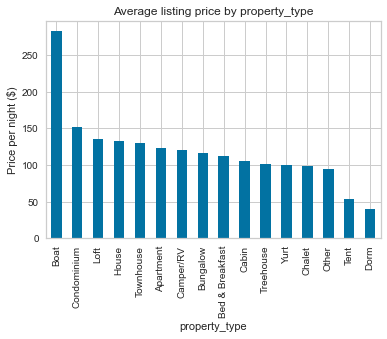

In [39]:
df_list.groupby(['property_type']).mean()['price'].sort_values(ascending = False).plot(kind = 'bar');
plt.title('Average listing price by property_type')
plt.ylabel('Price per night ($)');

In [40]:
df_list.loc[df_list['property_type']=='Boat']['price'].mean() , df_list.loc[df_list['property_type']=='Boat']['price'].median()

(282.375, 150.0)

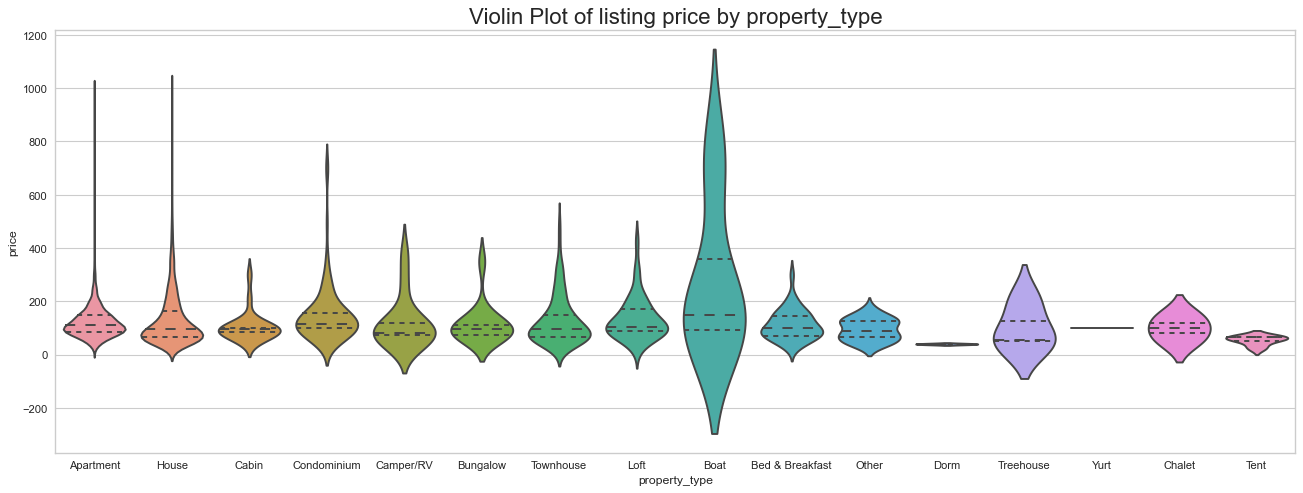

In [41]:
# Draw Plot
plt.figure(figsize=(20,7), dpi= 80)
sns.violinplot(x='property_type', y='price', data=df_list, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of listing price by property_type', fontsize=20)
plt.show()

- A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
- If the shape of the distribution is extremely skinny on each end and wide in the middle, it indicates the values are highly concentrated around the median.
- Reading the violin shape is exactly how you read a density plot: the thicker part means the values in that section of the violin has higher frequency, and the thinner part implies lower frequency.
- Violin plots are easy to read. The dot in the middle is the median. The box presents interquartile range. The whiskers show 95% confidence interval. The shape of the violin display frequencies of values. Different violins are different sets.

- Houses and Apartments are the most dominant property types listed
- Boats and Condominium's are most expensive 
- Tents and Dorm's are the cheapest

In [42]:
df_list.loc[df_list['property_type']=='Boat']['price']


212      85.0
319     680.0
561     150.0
565     775.0
567     249.0
1917     95.0
3263    150.0
3303     75.0
Name: price, dtype: float64

In [43]:
df_list.neighbourhood_cleansed.value_counts()

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Mann                          67
Ravenna                       67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Green Lake                    54
North Queen Anne              54
Atlantic                      53
Leschi                        53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park                   44
Maple Leaf

### Neighbourhoods with Highest Average Listing Price

In [44]:
n = 10
price_neighbourhood = df_list.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending = False).head(n)

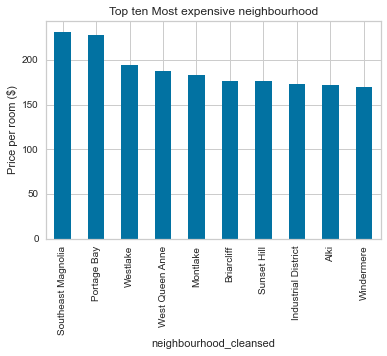

In [45]:

price_neighbourhood.plot(kind = 'bar')
plt.title('Top ten Most expensive neighbourhood')
plt.ylabel('Price per room ($)');

- Southeast Magnolia, Portage Bay and Westlake have the highest average listing prices.



#### 2.1.3 Explore Reviews Dataset <a class="anchor" id="Explore_Reviews_Dataset"></a>

In [46]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


##### 2.1.3.1 Missing Review Values <a class="anchor" id="Missing_Review_Values"></a>

In [47]:
df_rev.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [48]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


##### 2.1.3.2 Unique Review Values  <a class="anchor" id="Unique_Review_Values"></a>

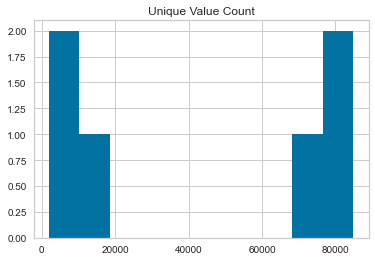

In [49]:
pd.DataFrame((df_rev.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count']).hist();

In [50]:
pd.DataFrame((df_rev.T.apply(lambda x: x.nunique(), axis=1)), columns=['Unique Value Count'])

,Unique Value Count
listing_id,3191
id,84849
date,1930
reviewer_id,75730
reviewer_name,14380
comments,84136


- We have reviews for 3191 listings out of a total of 3818 listings. So not all listings have a review
- It is clear some listings got multiple reviews
- Some reviewers have given more than one review.
- Comments are not provided for some reviews
- There is not a great deal this dataset can help us to provide answers for our guiding questions. The Listings data set has fields like review per month etc which provide information about listings with most and less reviews

## 3.Data Preparation <a class="anchor" id="Data_Preparation"></a>

### Q1. How the availability of listings and price vary over the course of the year? <a class="anchor" id="price_list_year"></a>

- How does availability of listings vary through out the year?
- What is the average availability of listings per month?
- How dooes price and availability move in relation to each other?

In [51]:
df_cal1 = df_cal

In [52]:
df_cal['month'] = pd.to_datetime(df_cal['date']).apply(lambda x: x.month)

In [53]:
df_cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [54]:
df_cal['date'].min() , df_cal['date'].max()

('2016-01-04', '2017-01-02')

- The data is for values from 04th Jan 2016 til 02nd Jan 2017. For all monthly analysis let us combine 2016 and 2017 Jan data

In [55]:
df_avail_bylisting = df_cal.groupby('listing_id')['available'].sum().reset_index()

In [56]:
df_avail_bylisting

,listing_id,available
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53
...,...,...
3813,10332096,365
3814,10334184,361
3815,10339144,0
3816,10339145,365


In [57]:
df_avail_bylisting['available'].describe()

count    3818.000000
mean      244.772656
std       126.772526
min         0.000000
25%       124.000000
50%       308.000000
75%       360.000000
max       365.000000
Name: available, dtype: float64

- Some listings are available 365 days and some are not available at all
- On average the availability is 244 days
- Less than 25% of listings are available for a period of less than 125 days  in a year. These are the casual hosts.
- The hosts in the 75th Percentile are the more serious one's who probably use airbnb as a regular income source and probably would care more about reviews.
- It would be interesting to see if these regular hosts vary their listing price more based on demand.

In [58]:
df_avail_bymonth = df_cal.groupby('month')['available'].sum().reset_index()
df_avail_bymonth

,month,available
0,1,64937
1,2,73321
2,3,83938
3,4,76037
4,5,79971
5,6,77244
6,7,74222
7,8,76347
8,9,77246
9,10,82438


In [59]:
df_price_bymonth = df_cal[df_cal['available'] == 1].groupby('month')['price'].mean().reset_index()
df_price_bymonth

,month,price
0,1,122.912176
1,2,124.293927
2,3,128.644488
3,4,135.097005
4,5,139.538183
5,6,147.473137
6,7,152.094150
7,8,150.656594
8,9,143.255949
9,10,137.031939


- Let us now plot the monthly availability along with monthly listing average
- While computing monthly listing average let us only consider available listings 

In [60]:
df_bymonth = df_price_bymonth.join(df_avail_bymonth, how='inner', lsuffix='_left') 
df_bymonth

,month_left,price,month,available
0,1,122.912176,1,64937
1,2,124.293927,2,73321
2,3,128.644488,3,83938
3,4,135.097005,4,76037
4,5,139.538183,5,79971
5,6,147.473137,6,77244
6,7,152.094150,7,74222
7,8,150.656594,8,76347
8,9,143.255949,9,77246
9,10,137.031939,10,82438


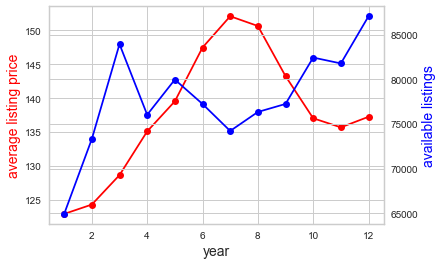

In [61]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_bymonth.month, df_bymonth.price, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("average listing price",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_bymonth.month, df_bymonth["available"],color="blue",marker="o")
ax2.set_ylabel("available listings",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

### Answer 1
- We see that the available listings drop in Summer months only to peak from October to December.
- During the early part of the year, more listings are available in March.
- The average listing price peaks during Summer monmths when the listings hit bottom, hinting at a Demand-supply situation.As expected price is high when availabiliy is low and vice-versa.
- As a host, it makes sense to list during Summer months for maximum earnings and use the winter months for maintenance and repairs.

Questions for further exploration 
- How does price vary between weekdays and weekends?
- Can we visualize price variation around prominent national holidays? (not part of current exercise)

### Q2. Explore monthly price variation over the course of the year in greater depth <a class="anchor" id="monthly_price"></a>

In [62]:
filter = df_cal['available'] == 1
df_cal_exc = df_cal[filter][['month','price']]
df_cal_exc = df_cal_exc.set_index('month')
df_cal_exc.head()

,price
month,
1,85.0
1,85.0
1,85.0
1,85.0
1,85.0


In [63]:
def get_monthly_price_quantiles(date_prices):
    """
        get monthly price quantiles and mean from date-prices
    """
    date_prices = date_prices.groupby(date_prices.index)
    monthly_prices = pd.concat([date_prices.quantile(q=0.25), date_prices.quantile(q=0.5), date_prices.mean(), date_prices.quantile(q=0.75)], axis=1)
    monthly_prices.columns = ["Q1", "Q2", "mean", "Q3"]
    
    return monthly_prices

monthly_price_quantiles = get_monthly_price_quantiles(df_cal_exc)
monthly_price_quantiles

,Q1,Q2,mean,Q3
month,,,,
1,70.0,99.0,122.912176,148.0
2,72.0,100.0,124.293927,149.0
3,75.0,100.0,128.644488,150.0
4,75.0,110.0,135.097005,160.0
5,75.0,110.0,139.538183,169.0
6,76.0,110.0,147.473137,175.0
7,75.0,115.0,152.094150,180.0
8,75.0,114.0,150.656594,179.0
9,75.0,110.0,143.255949,175.0


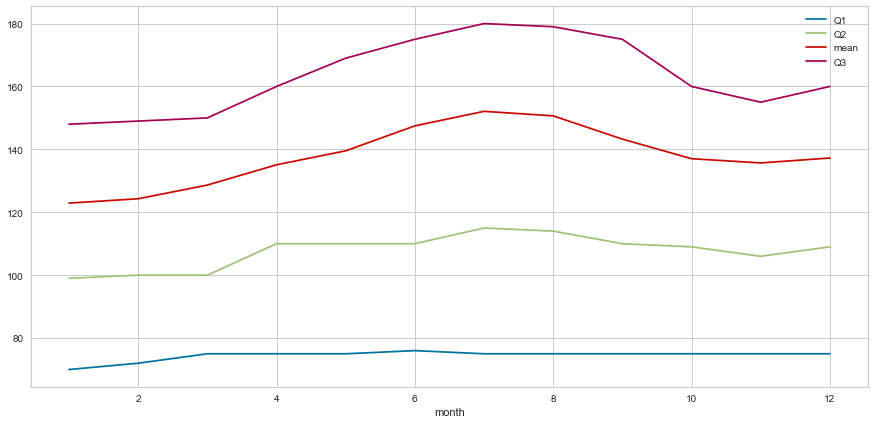

In [64]:
def plot_line_monthly_prices_quantile(monthly_price_quantiles):
    """
        show bar plot the quantile, mean prices by month
    """
    monthly_price_quantiles.plot.line(figsize=(15, 7))
    
plot_line_monthly_prices_quantile(monthly_price_quantiles)

In [65]:
filter = df_cal['available'] == 1
df_cal_wk = df_cal[filter][['month','price','date']]
#df_cal_exc = df_cal_exc.set_index('month')
df_cal_wk.head()

,month,price,date
0,1,85.0,2016-01-04
1,1,85.0,2016-01-05
9,1,85.0,2016-01-13
10,1,85.0,2016-01-14
14,1,85.0,2016-01-18


In [66]:
df_cal.shape , df_cal_wk.shape

((1393570, 5), (934542, 3))

In [67]:
df_cal_wk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   month   934542 non-null  int64  
 1   price   934542 non-null  float64
 2   date    934542 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 28.5+ MB


In [68]:
def check_weekday(date):    
    '''
    INPUT
    date - any date
    
    OUTPUT
    1 if business day
    0 if weekend
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    '''
    res=len(pd.bdate_range(date,date))
      
    if res == 0 :
        # weekend
        return 0
    else:
        # business day
        return 1

In [69]:
df_cal_wk['isweekday'] = df_cal_wk.apply(lambda row : check_weekday(row['date']),axis=1)

In [70]:
df_cal_wk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      934542 non-null  int64  
 1   price      934542 non-null  float64
 2   date       934542 non-null  object 
 3   isweekday  934542 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 35.6+ MB


In [71]:
df_cal_wk.tail()

,month,price,date,isweekday
1393207,1,87.0,2016-01-06,1
1393208,1,87.0,2016-01-07,1
1393211,1,87.0,2016-01-10,0
1393212,1,87.0,2016-01-11,1
1393213,1,87.0,2016-01-12,1


In [72]:
df_cal_wk_avg = df_cal_wk.groupby(["month","isweekday"], as_index=True)['price'].mean()
df_cal_wk_avg

month  isweekday
1      0            125.708888
       1            121.669069
2      0            127.040250
       1            123.249671
3      0            131.089309
       1            127.792072
4      0            137.347793
       1            134.141484
5      0            141.316227
       1            138.810376
6      0            148.867595
       1            146.968422
7      0            153.222933
       1            151.557614
8      0            151.983171
       1            150.194369
9      0            145.193172
       1            142.553225
10     0            138.571606
       1            136.299167
11     0            137.402796
       1            135.064977
12     0            139.009966
       1            136.532149
Name: price, dtype: float64

- Quite clear, average listing price is higher on weekends compared to weekdays

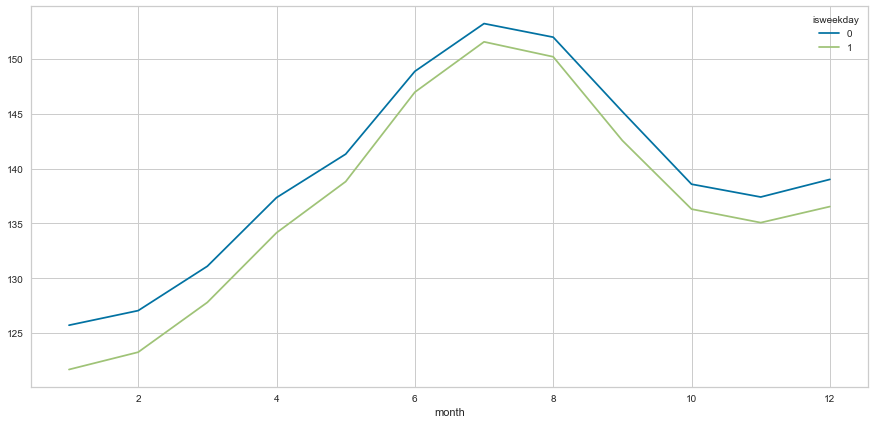

In [73]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_cal_wk_avg.unstack().plot(ax=ax);

In [74]:
df_cal_wk.head()

,month,price,date,isweekday
0,1,85.0,2016-01-04,1
1,1,85.0,2016-01-05,1
9,1,85.0,2016-01-13,1
10,1,85.0,2016-01-14,1
14,1,85.0,2016-01-18,1


### Answer 2
- Continuing from our previous question, Price in general is lowest till April and tends to peak from June to August
- Price of cheaper listings seems to be consistent across the year and does not change much especially from March.
- Prices of listings in the 3rd quantile seem to be more affected by seasonal changes. In other words expensive listings are even more expensive during Summer months.
- When it comes to weekday vs weekend price averages, the prices on weekends are always higher compared to weekdays. However the two curves move together which clearly indicates most listings apply a fixed markup for weekend pricing.

### Q3.Price Influencers - Feature Selection <a class="anchor" id="price_influencers"></a>

- Apart from the seasonal demand - there should be many other factors influencing price of a listing. 
- These can be Quantitative or Categorical variables.
- Let us try to first understand the Quantitative variables influencing price
- Let us employ different techniques to select features that are most likely to predict price

In [150]:
py_num_types = ['int16','int','int32','int64','float','float16','float32','float64']

In [151]:
num_cols = list(df_list.select_dtypes(include=py_num_types).columns)
num_cols

['listing_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'weekly_price',
 'monthly_price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']

In [152]:
num_df_list = df_list[num_cols]

In [153]:
pearson_corr = num_df_list.corr(method='spearman')
pearson_corr

,listing_id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
listing_id,1.000000,0.521138,-0.110877,-0.110877,-0.075995,-0.059446,-0.072895,-0.062025,-0.071821,-0.031272,0.003570,-0.137593,-0.216667,0.272582,-0.055310,-0.063006,-0.070411,-0.128410,-0.642867,0.198204,0.108112,0.127407,0.036345,0.051223,0.140111,0.153350,-0.097342,0.116688
host_id,0.521138,1.000000,-0.274074,-0.274074,-0.101076,-0.057558,-0.095176,-0.084529,-0.075850,0.027648,0.040850,-0.093497,-0.199963,0.138062,-0.034163,-0.037499,-0.039722,-0.071209,-0.264542,0.104306,0.069241,0.084132,0.043304,0.052184,0.078079,0.107624,-0.229397,0.168345
host_listings_count,-0.110877,-0.274074,1.000000,1.000000,0.071917,0.080428,0.051663,0.090556,0.009671,-0.051573,-0.032469,-0.016335,0.059387,0.073633,0.137630,0.150679,0.159614,0.130366,0.059972,-0.157383,-0.165488,-0.095253,-0.163026,-0.150831,-0.064019,-0.168289,0.867430,-0.074972
host_total_listings_count,-0.110877,-0.274074,1.000000,1.000000,0.071917,0.080428,0.051663,0.090556,0.009671,-0.051573,-0.032469,-0.016335,0.059387,0.073633,0.137630,0.150679,0.159614,0.130366,0.059972,-0.157383,-0.165488,-0.095253,-0.163026,-0.150831,-0.064019,-0.168289,0.867430,-0.074972
accommodates,-0.075995,-0.101076,0.071917,0.071917,1.000000,0.420370,0.658111,0.826924,0.657318,0.656150,0.650953,0.386057,0.214235,0.002487,-0.062457,-0.070628,-0.077225,-0.080167,-0.026376,-0.007002,-0.044174,0.021376,-0.020741,-0.026498,-0.005680,-0.072158,-0.035700,-0.143022
bathrooms,-0.059446,-0.057558,0.080428,0.080428,0.420370,1.000000,0.546343,0.443222,0.375187,0.334120,0.328651,0.122186,0.154497,-0.016589,-0.046504,-0.048058,-0.048341,-0.013574,-0.090337,0.089083,-0.003349,0.014358,0.019648,-0.018762,-0.006148,0.015882,0.004254,-0.199244
bedrooms,-0.072895,-0.095176,0.051663,0.051663,0.658111,0.546343,1.000000,0.682720,0.518034,0.486164,0.474215,0.242766,0.231282,0.008079,-0.060078,-0.065687,-0.068869,-0.047450,-0.101662,0.038863,-0.028184,-0.014722,0.016949,-0.006767,-0.026695,-0.015385,-0.039913,-0.249373
beds,-0.062025,-0.084529,0.090556,0.090556,0.826924,0.443222,0.682720,1.000000,0.563084,0.544039,0.520722,0.305499,0.216550,0.012912,-0.037813,-0.044956,-0.051678,-0.038487,-0.070858,-0.009678,-0.060976,0.002000,-0.027297,-0.040002,-0.031894,-0.048129,-0.011735,-0.173932
price,-0.071821,-0.075850,0.009671,0.009671,0.657318,0.375187,0.518034,0.563084,1.000000,0.930973,0.875069,0.280718,0.269282,0.014317,-0.032114,-0.038276,-0.042809,-0.032289,-0.110405,0.088327,0.031060,0.077205,0.015161,0.025869,0.132000,-0.072306,-0.089121,-0.262559
weekly_price,-0.031272,0.027648,-0.051573,-0.051573,0.656150,0.334120,0.486164,0.544039,0.930973,1.000000,0.942602,0.328215,0.231875,-0.005050,-0.021462,-0.041650,-0.053935,-0.069058,-0.052948,0.073724,0.077338,0.103351,0.048863,0.037837,0.144671,-0.101259,-0.138357,-0.120363


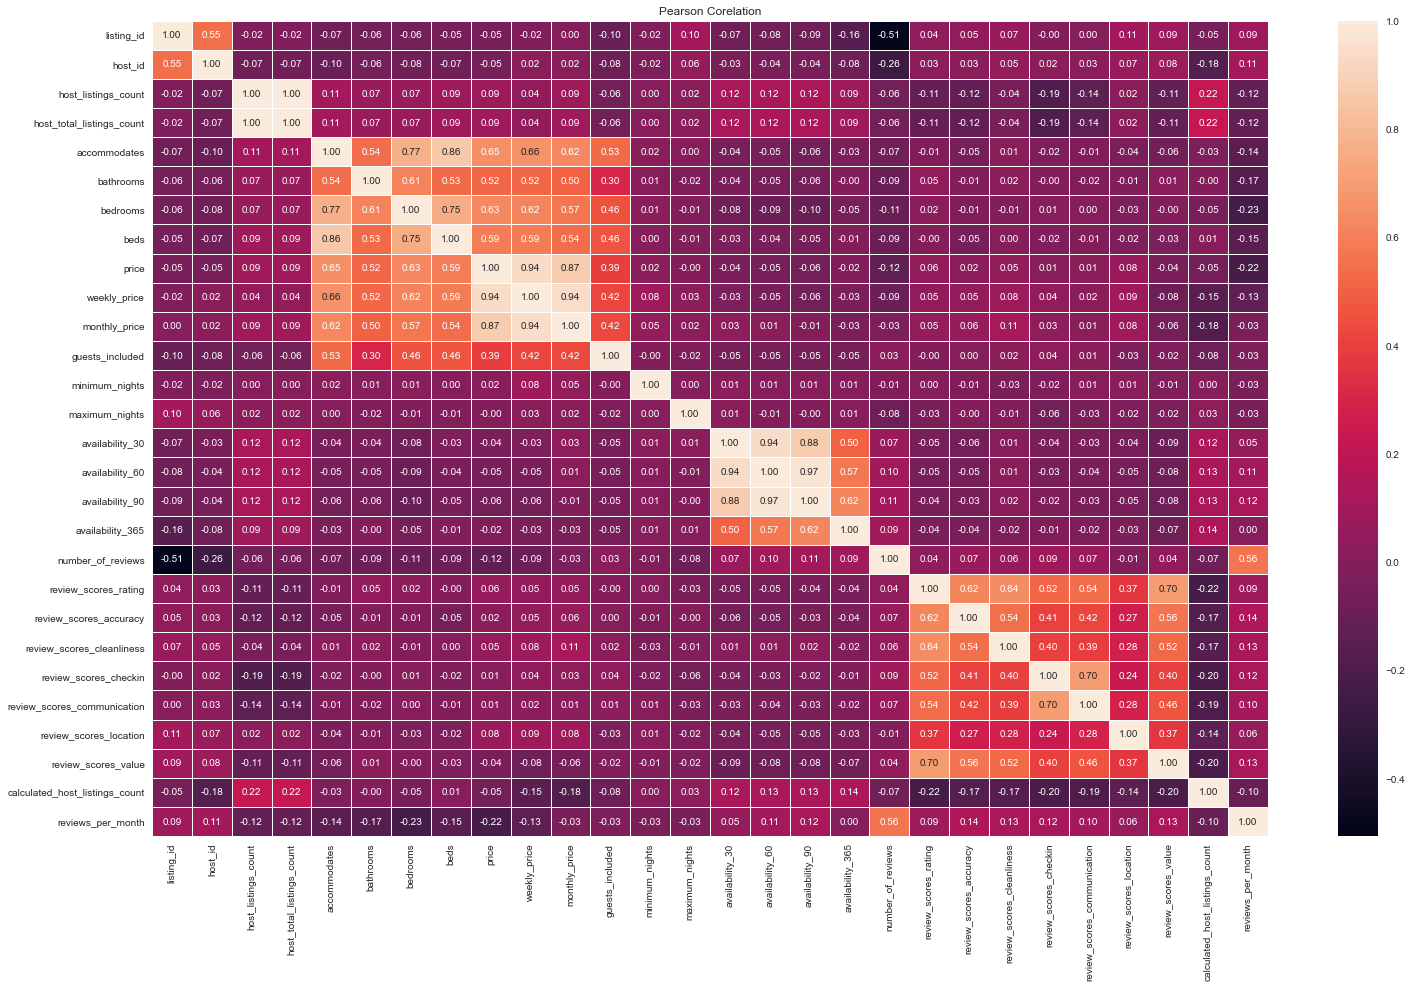

In [154]:
fig, ax = plt.subplots(figsize=(25,15)) 
plt.title("Pearson Corelation")
sns.heatmap(df_list.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax);

- Correlation of Quantitative Attributes 
    - The number of bedrooms, the number of bathrooms, and the number of beds have a high correlation with each other and a high correlation with price. It’s natural to think that the more rooms, beds, and toilets you have, the more expensive it becomes. However, the number of people(accomodates) was the most influential among them (0.65).
    - Whether or not a homestay can be rented for a long time has no significant correlation with other features other than each other. 
    - The minimum and maximum stay dates are not significantly correlated with other features.
    - Currently we have not seen the influence of neighbourhood and property type on price, these are categorical variables. It would be interesting to see this correlation

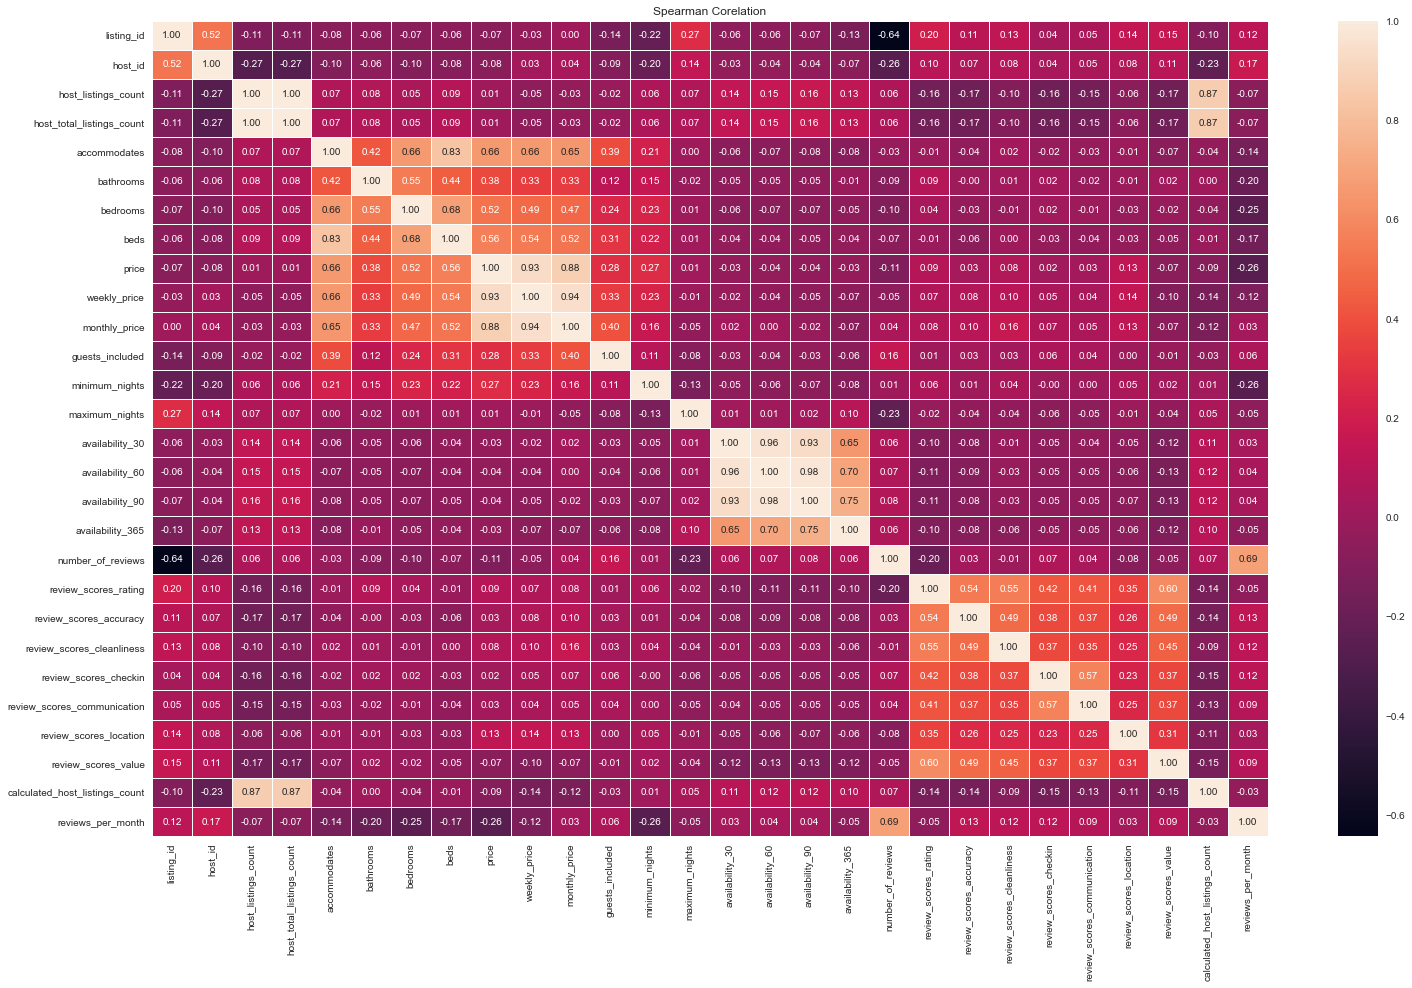

In [155]:
fig, ax = plt.subplots(figsize=(25,15)) 
plt.title("Spearman Corelation")
sns.heatmap(df_list.corr("spearman"), annot=True, fmt=".2f", linewidths=.5, ax=ax);

- Spearman's corelation measures monotonic associations between two variables i.e. strictly increasing or decreasing

In [156]:
num_df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      3818 non-null   int64  
 1   host_id                         3818 non-null   int64  
 2   host_listings_count             3816 non-null   float64
 3   host_total_listings_count       3816 non-null   float64
 4   accommodates                    3818 non-null   int64  
 5   bathrooms                       3802 non-null   float64
 6   bedrooms                        3812 non-null   float64
 7   beds                            3817 non-null   float64
 8   price                           3818 non-null   float64
 9   weekly_price                    2009 non-null   float64
 10  monthly_price                   1517 non-null   float64
 11  guests_included                 3818 non-null   int64  
 12  minimum_nights                  38

In [157]:
num_df_list = num_df_list.drop(['weekly_price','monthly_price'],axis=1)

In [158]:
num_df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      3818 non-null   int64  
 1   host_id                         3818 non-null   int64  
 2   host_listings_count             3816 non-null   float64
 3   host_total_listings_count       3816 non-null   float64
 4   accommodates                    3818 non-null   int64  
 5   bathrooms                       3802 non-null   float64
 6   bedrooms                        3812 non-null   float64
 7   beds                            3817 non-null   float64
 8   price                           3818 non-null   float64
 9   guests_included                 3818 non-null   int64  
 10  minimum_nights                  3818 non-null   int64  
 11  maximum_nights                  3818 non-null   int64  
 12  availability_30                 38

In [159]:
cols_na = ['host_listings_count','host_total_listings_count','bathrooms','beds','review_scores_rating',
           'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value','reviews_per_month','bedrooms']
''' 
From our exploratory analysis,data is missing completely at random, so we assume that the missing values are 
most likely very close to the value of the mean or the median of the distribution, as these represent the most 
frequent/average observation. Also we observed the presence of outliers, the mean is biased by the values at 
the far end of the distribution. 
Therefore, the median is a better representation of the majority of the values in the variable.So we choose to 
impute by median
'''
for col in cols_na:
    num_df_list[col] = num_df_list.loc[:,col].fillna(num_df_list[col].median())
    

In [160]:
target = num_df_list['price']
features = num_df_list.drop('price',axis=1)

In [161]:
from yellowbrick.target import FeatureCorrelation
feature_names= list(features.columns)

In [162]:
vis = FeatureCorrelation(labels = feature_names, method='pearson')


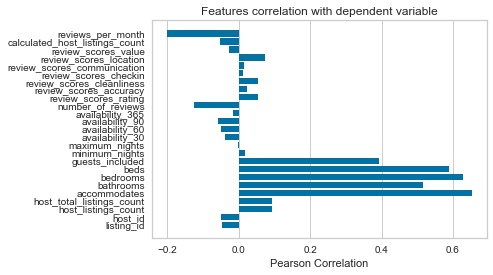

In [163]:
vis.fit(features,target)
vis.poof();

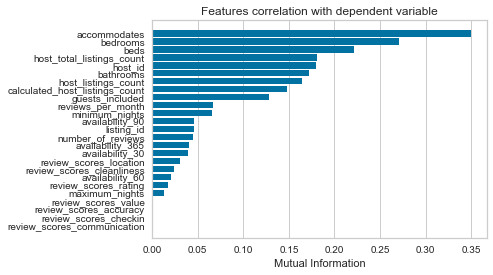

In [164]:
vis = FeatureCorrelation(labels = feature_names, method='mutual_info-regression',sort=True)
vis.fit(features,target)
vis.poof();

### Feature Selection Using Univariate analysis <a class="anchor" id="Univariate_analysis"></a>

In [165]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [166]:
select_univariate = SelectKBest(f_regression,k=6).fit(features,target)

In [167]:
feature_mask = select_univariate.get_support()
feature_mask

array([False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [168]:
features.columns[feature_mask]

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'reviews_per_month'],
      dtype='object')

In [169]:
select_univariate.scores_

array([8.19403276e+00, 1.00817417e+01, 3.39305772e+01, 3.39305772e+01,
       2.82500577e+03, 1.38479165e+03, 2.48011806e+03, 2.02697513e+03,
       6.96509708e+02, 1.14208673e+00, 4.24636521e-02, 5.41779562e+00,
       9.31101760e+00, 1.32437626e+01, 9.22931492e-01, 6.02711828e+01,
       1.07050030e+01, 1.88461050e+00, 1.12630416e+01, 4.46131820e-01,
       9.03998475e-01, 2.00640145e+01, 3.18223975e+00, 1.11979813e+01,
       1.60350020e+02])

In [170]:
pd.DataFrame({'FeatureName':features.columns ,
               'Score':select_univariate.scores_ }).sort_values(by='Score', ascending=False)

,FeatureName,Score
4,accommodates,2825.005775
6,bedrooms,2480.118063
7,beds,2026.975129
5,bathrooms,1384.791652
8,guests_included,696.509708
24,reviews_per_month,160.350020
15,number_of_reviews,60.271183
2,host_listings_count,33.930577
3,host_total_listings_count,33.930577
21,review_scores_location,20.064014


In [171]:
uni_df = pd.DataFrame({'FeatureName':features.columns[feature_mask]})
uni_df

,FeatureName
0,accommodates
1,bathrooms
2,bedrooms
3,beds
4,guests_included
5,reviews_per_month


In [172]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Select the numeric variables in the dataset
    2. Imputes the mode to fill null values for numeric variables
    3. Select the categorical variables
    4. Creates dummy columns for the categorical variables
    5. Returns the new dataframe

    '''
  
    num_vars= df.select_dtypes(include=['int','float']).columns

    ''' 
    From our exploratory analysis,data is missing completely at random, so we assume that the missing values are 
    most likely very close to the value of the mean or the median of the distribution, as these represent the most 
    frequent/average observation. Also we observed the presence of outliers, the mean is biased by the values at 
    the far end of the distribution. 
    Therefore, the median is a better representation of the majority of the values in the variable.
    So we choose to impute by median.
    '''
    for var in num_vars:
        df[var].fillna((df[var].median()), inplace=True)

   
    cat_vars = df.select_dtypes(include=['object']).columns

   
    for var in cat_vars:
        # for each categorical add dummy variable, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
   
    return df

- If data is missing completely at random, then it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent/average observation.
- When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.
- If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
- In this case the values are indeed missing at random ands we choose to impute by median

In [173]:
filtered_df = df_list[[ "listing_id","host_is_superhost", "neighbourhood_cleansed", "property_type","room_type", "cancellation_policy"]]


In [174]:
newdf = clean_data(filtered_df)

/Users/gangireddyl/opt/anaconda3/envs/udacity/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Feature Selection Recursive Feature Elimination <a class="anchor" id="RFE"></a>

In [175]:
from sklearn.feature_selection import RFE
## Recurisve Feature Elimination
linear_regression = LinearRegression()

In [176]:
rfe = RFE(estimator = linear_regression, n_features_to_select = 6 , step =1)

In [177]:
rfe.fit(features,target)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [178]:
rfe_features = features.columns[rfe.support_]
rfe_features

Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'review_scores_location'],
      dtype='object')

In [179]:
pd.DataFrame({'FeatureName':features.columns ,
               'Rank': rfe.ranking_ }).sort_values(by='Rank')

,FeatureName,Rank
2,host_listings_count,1
3,host_total_listings_count,1
4,accommodates,1
5,bathrooms,1
6,bedrooms,1
21,review_scores_location,1
22,review_scores_value,2
17,review_scores_accuracy,3
18,review_scores_cleanliness,4
24,reviews_per_month,5


In [180]:
features

,listing_id,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,956883,3.0,3.0,4,1.0,1.0,1.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,5177328,6.0,6.0,4,1.0,1.0,1.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,16708587,2.0,2.0,11,4.5,5.0,7.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,9851441,1.0,1.0,3,1.0,0.0,2.0,1,1,1125,0,0,0,143,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.54
4,278830,1452570,2.0,2.0,6,2.0,3.0,3.0,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,31148752,354.0,354.0,6,2.0,3.0,3.0,1,3,1125,18,32,32,32,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,8,0.30
3814,8902327,46566046,1.0,1.0,4,1.0,1.0,2.0,3,2,29,6,26,44,273,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.00
3815,10267360,52791370,1.0,1.0,2,1.0,1.0,1.0,2,1,7,29,59,88,88,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.54
3816,9604740,25522052,1.0,1.0,2,1.0,0.0,1.0,1,3,1125,30,60,90,179,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.54


In [181]:
newdf

,listing_id,host_is_superhost_t,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,...,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,241032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,953595,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3308979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,7421966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,

In [182]:
cols = ['listing_id','review_scores_value','accommodates','bedrooms','bathrooms','review_scores_location','review_scores_accuracy']

In [183]:
df_list_cat = pd.merge(features[cols] ,newdf, on='listing_id')

## 4.Modeling <a class="anchor" id="Modeling"></a>

In [184]:
## Model Using RFE Features +  Categoriacal Variables

In [185]:
X_new=df_list_cat.drop(['listing_id'],axis=1)
y_new=df_list['price']

In [186]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = .40, random_state=42)
#Instantiate
lm_model = LinearRegression(normalize=True) 
#Fit
lm_model.fit(X_train_new, y_train_new) 

LinearRegression(normalize=True)

In [187]:
#Predict and score the model
y_train_preds_new = lm_model.predict(X_train_new)
print("The r-squared score for your model on the training data was {} on {} values. The RMSE was {}".format(r2_score(y_train_new, y_train_preds_new), len(y_train_new), mean_squared_error(y_train_new, y_train_preds_new)))
y_test_preds_new = lm_model.predict(X_test_new) 
print("The r-squared score for your model on the test data was {} on {} values.  The RMSE was {}".format(r2_score(y_test_new, y_test_preds_new), len(y_test_new), mean_squared_error(y_test_new, y_test_preds_new)))



The r-squared score for your model on the training data was 0.5931955393347182 on 2290 values. The RMSE was 3201.4121572107842
The r-squared score for your model on the test data was 0.5651962923347036 on 1528 values.  The RMSE was 3717.4343157412236


In [188]:
## Model Using Univariate analysis Features +  Categoriacal Variables

In [189]:
cols = ['listing_id','bathrooms','bedrooms','beds','guests_included','accommodates','reviews_per_month']

In [190]:
df_list_cat = pd.merge(features[cols] ,newdf, on='listing_id')

In [191]:
X_new=df_list_cat.drop(['listing_id'],axis=1)
y_new=df_list['price']

In [192]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = .40, random_state=42)
#Instantiate
lm_model = LinearRegression(normalize=True) 
#Fit
lm_model.fit(X_train_new, y_train_new) 

LinearRegression(normalize=True)

## 5.Results and Evaluation  <a class="anchor" id="Results_and_Evaluation"></a>

In [193]:
#Predict and score the model
y_train_preds_new = lm_model.predict(X_train_new)
print("The r-squared score for your model on the training data was {} on {} values. The RMSE was {}".format(r2_score(y_train_new, y_train_preds_new), len(y_train_new), mean_squared_error(y_train_new, y_train_preds_new)))
y_test_preds_new = lm_model.predict(X_test_new) 
print("The r-squared score for your model on the test data was {} on {} values.  The RMSE was {}".format(r2_score(y_test_new, y_test_preds_new), len(y_test_new), mean_squared_error(y_test_new, y_test_preds_new)))



The r-squared score for your model on the training data was 0.6012160768078956 on 2290 values. The RMSE was 3138.2932667934997
The r-squared score for your model on the test data was 0.5704760528515537 on 1528 values.  The RMSE was 3672.2940315665014


The r-squared score and root-mean-square error (RMSE) were used to score the model.

The r-squared score measures for relative goodness-of-fit.

RMSE is an absolute measure of fit. It's useful since it is measured in the same units as the dependent variable. It is a simple loss function that we seek to minimize (without overfitting).

R-squared is a measure of how well a linear regression model “fits” a dataset. Also commonly called the coefficient of determination, R-squared is the proportion of the variance in the response variable that can be explained by the predictor variable.

The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

If your main objective is to predict the value of the response variable accurately using the predictor variable, then R-squared is important.

In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable.



The root-mean-squared error (RMSE) is a measure of how well your model performed. It does this by measuring difference between predicted values and the actual values.

In a good model, the RMSE should be close for both your testing data and your training data. If the RMSE for your testing data is higher than the training data, there is a high chance that your model overfit. In other words, your model performed worse during testing than training.

In general, RMSE is a commonly used metric and serves well as a general purpose error metric.

Other metrics include:

 - Absolute Error
 - Mean Absolute Error
 - Mean Squared Error

### Recap of findings

Univariate analysis approach of feature selection using SelectKBest and f_regression fared better in this case against RFE Ranking Estimator Recursive Feature Elimination.

   - Features selected using Univariate analysis approach:  
        'bathrooms','bedrooms','beds','guests_included','accommodates','reviews_per_month'
   - Features selected using RFE approach:
        'review_scores_value','accommodates','bedrooms','bathrooms','review_scores_location','review_scores_accuracy'

## 6.Conclusion <a class="anchor" id="Conclusion"></a>

Based on our analysis we can draw the below conclusions
- Listing prices peak in Summer months but the prices of already low-priced listings tend to not change much through out the year.
- Total listings available are less in Summer and increase towards end of year.
- Not surprisingly during period where fewer listings were available prices were high in general.
- Listing price has a strong correlation with number of bedrooms, the number of bathrooms, and the number of beds. It’s natural to think that the more rooms, beds, and toilets you have, the more expensive it becomes. However, the number of people a property could accomodate had a high influence on price.
- We used two different techniques to select features - RFE and Univariate analysis. accommodates,bedrooms,bathrooms are common features presented by both approaches
- We were then able to build two linear regession models to predict the list price based on quantitative variables prsented by both approaches by adding some more features by including categorical variables like neighbourhood, property type, cancellation policy etc..
- The results from the model showed the features selected using Univariate analysis provided a slighlty better r-squared score